In [3]:
# Ejecutar para que funcione el parse_latex en google colab

#!pip install sympy==1.5 antlr4-python3-runtime==4.7.1

# !pip install antlr4-python3-runtime==4.7.1

     |████████████████████████████████| 112kB 5.5MB/s 
  Created wheel for antlr4-python3-runtime: filename=antlr4_python3_runtime-4.7.1-cp37-none-any.whl size=140552 sha256=0aa9757351b710995dab5b317a03870bcc4c1fefd3fe705dd1f41e0d3acee2cd
  Stored in directory: /root/.cache/pip/wheels/ef/f6/18/ad300e691236a3408a99edc750484b56e8d6b11b2c38eacb10
Successfully built antlr4-python3-runtime


In [1]:
from sympy import init_session
from sympy.parsing.latex import parse_latex
from sympy.parsing.sympy_parser import parse_expr
from IPython.display import Markdown as md
from IPython.display import display


init_session()

IPython console for SymPy 1.6.2 (Python 3.6.12-64-bit) (ground types: gmpy)

These commands were executed:
>>> from __future__ import division
>>> from sympy import *
>>> x, y, z, t = symbols('x y z t')
>>> k, m, n = symbols('k m n', integer=True)
>>> f, g, h = symbols('f g h', cls=Function)
>>> init_printing()

Documentation can be found at https://docs.sympy.org/1.6.2/



In [2]:

from sympy.solvers.inequalities import solve_univariate_inequality, reduce_rational_inequalities, reduce_abs_inequality

from sympy.calculus.util import continuous_domain, function_range


import matplotlib.pyplot as plt

# %matplotlib inline

In [3]:
# Para que salga bien hay que dejar el matplolib offline

def dominio_trozos(f) :
    set = S.EmptySet
    for t in f.args :
        set = Union(set,continuous_domain(f,x,t[1].as_set()))
    return set



def grafica_funcion_trozos(f, sz=20):
    
    cerrados, abiertos, cerrados_imagen, abiertos_imagen = [],[],[],[]
#     sz=20
    conj_ant=EmptySet
    p=plot(x,(x,0,0),show=False)
    for t in f.args:
#         display(t.args)
#         display(t.args[1].as_set().args)
        actual=S.Reals if t.args[1]==True else t.args[1].as_set()
        conj=Complement(actual,conj_ant)
#         display(conj)
#         display(conj.args)
        ini = conj.args[0] if conj.args[0] != -oo else -sz
        fin = conj.args[1] if conj.args[1] != +oo else sz
#         display(ini,fin)
        p.extend(plot(t.args[0],(x,ini,fin),show=False))
        for j in range(2):  
            if abs(conj.args[j]) != oo :
                if conj.args[j+2] :
                    abiertos.append(conj.args[j])
                    abiertos_imagen.append(t.args[0].subs(x,conj.args[j]))
#                     display(conj.args[j])
                else :
                    cerrados.append(conj.args[j])
                    cerrados_imagen.append(t.args[0].subs(x,conj.args[j]))
#                     display(conj.args[j])       
        conj_ant=t.args[1].as_set()

    abiertos, abiertos_imagen, cerrados, cerrados_imagen
    p.show()
    fg = p._backend.fig 
    ax = p._backend.ax   
    ax[0].set_xlim(-sz,sz)
    ax[0].set_ylim(-sz,sz)
    ax[0].set_aspect('equal')
    plt.scatter([abiertos],[abiertos_imagen],edgecolors='blue',facecolors='white')
    plt.scatter([cerrados],[cerrados_imagen],edgecolors='blue',facecolors='blue')
    plt.grid(True)
    
    return f, fg

In [5]:
def latex_exam(question, parts):
    tex=r"\question "+question+r"\begin{parts} "
    for p in parts :
        tex+=r"\part[1] "+p[0]+r"\begin{solution} "+p[1]+r"\end{solution} " 
    tex+=r"\end{parts} "
    
    return tex

def mostrar_ejercicio(ejercicio,solucion,tipo=0) :
    #tipo=0 se pasa el ejercicio y la solucion en formato latex
    if tipo == 0 :
        display(md("#### Ejercicio:"))
        display(md(r"{} $\to$ {}".format(ejercicio, solucion)))
        print("enunciado_latex: " + ejercicio)
        print("solucion_latex: " + solucion)
        return ejercicio, solucion
    elif tipo == 1:
        # falta desarrollar ...
        display(md("#### Ejercicio:"))
        display(md(r"{} $\to$ {}".format(ejercicio, solucion)))
        print("enunciado_latex: " + ejercicio)
        print("solucion_latex: " + solucion)
        return ejercicio, solucion

        

In [15]:
# Calcular el dominio de las siguientes funciones:

# Ojo que las raíces cuartas no las hace bien

texto_ejercicio = 'Calcular el dominio de las siguientes funciones:'
display(md("**"+texto_ejercicio+"**"))

pre_enunciado_latex = [r'\frac{x+13}{x^4+x^3-3x^2-3x}', 
                       r'x^6+x^2-2',r'\frac{7x+9}{x^3+8}',
                       r'\sqrt{\frac{x-1}{x}}', r'\sqrt[3]{\frac{x-1}{x}}', r'\sqrt[4]{\frac{x(x+7)}{x^2+5x+6}}',
                       r'\frac{x^3-6x^2+4x+8}{x^3-x^2-9x+9}',r'\frac{1}{4x^2-1}',r'\frac{1}{\sqrt[4]{9-x^2}}',
                       r'\frac{2x+7}{\sqrt[3]{9-x}}',r'\frac{x^2-5x+6}{\sqrt{x^4-1}}',r'\sqrt{-2x^2+5x-3}',
                       r'\frac{x^2-3}{x^3-2x^2-x+2}',r'\frac{5x^3-8}{1+x+x^2}',r'\frac{x-1}{x^4-7x^2-144}',
                       r'\frac{7x+9}{81x^4-16}',
                       r'\sqrt[3]{\frac{x^6-5x+1}{x^2-4x+4}}',
                       r'\frac{\sqrt{x^2-4x-5}}{x^2+2x+1}',
#                        Autoevaluacion
                        r'\frac{1}{x^2+2x+1}',r'\sqrt{x^2+2x-2}',
                       r'\sqrt{\frac{x^2+x}{x-2}}', r'\frac{x^4+2x+5}{x^4-9x^2+4x+12}',
#                        Examen
                       r'\frac{2x+1}{x^{2} - 4 x + 3}',r'\sqrt{x^2+3x+2}',
                       r'\frac{2x-1}{x^{2} + 4 x + 3}',r'\sqrt{x^{2} - 3 x + 2}',
                       r'\frac{1}{2-\sqrt{x}}'
                       ]

question=texto_ejercicio
parts=[]
for i in pre_enunciado_latex :
    enun, sol =r"$f(x)="+latex(parse_latex(i))+r"$",r"$"+latex(continuous_domain(parse_latex(i),x,S.Reals))+r"$"
    enun, sol =r"$f(x)="+i+r"$",r"$"+latex(continuous_domain(parse_latex(i),x,S.Reals))+r"$"
    mostrar_ejercicio(enun, sol) 
    parts.append([enun, sol])
#     plot_implicit(Eq(y,parse_latex(i)))               


print(latex_exam(question, parts).replace(r'\frac',r'\dfrac'))

**Calcular el dominio de las siguientes funciones:**

#### Ejercicio:

$f(x)=\frac{x+13}{x^4+x^3-3x^2-3x}$ $\to$ $\left(-\infty, - \sqrt{3}\right) \cup \left(- \sqrt{3}, -1\right) \cup \left(-1, 0\right) \cup \left(0, \sqrt{3}\right) \cup \left(\sqrt{3}, \infty\right)$

enunciado_latex: $f(x)=\frac{x+13}{x^4+x^3-3x^2-3x}$
solucion_latex: $\left(-\infty, - \sqrt{3}\right) \cup \left(- \sqrt{3}, -1\right) \cup \left(-1, 0\right) \cup \left(0, \sqrt{3}\right) \cup \left(\sqrt{3}, \infty\right)$


#### Ejercicio:

$f(x)=x^6+x^2-2$ $\to$ $\mathbb{R}$

enunciado_latex: $f(x)=x^6+x^2-2$
solucion_latex: $\mathbb{R}$


#### Ejercicio:

$f(x)=\frac{7x+9}{x^3+8}$ $\to$ $\left(-\infty, -2\right) \cup \left(-2, \infty\right)$

enunciado_latex: $f(x)=\frac{7x+9}{x^3+8}$
solucion_latex: $\left(-\infty, -2\right) \cup \left(-2, \infty\right)$


#### Ejercicio:

$f(x)=\sqrt{\frac{x-1}{x}}$ $\to$ $\left(-\infty, 0\right) \cup \left[1, \infty\right)$

enunciado_latex: $f(x)=\sqrt{\frac{x-1}{x}}$
solucion_latex: $\left(-\infty, 0\right) \cup \left[1, \infty\right)$


#### Ejercicio:

$f(x)=\sqrt[3]{\frac{x-1}{x}}$ $\to$ $\left(-\infty, 0\right) \cup \left(0, \infty\right)$

enunciado_latex: $f(x)=\sqrt[3]{\frac{x-1}{x}}$
solucion_latex: $\left(-\infty, 0\right) \cup \left(0, \infty\right)$


#### Ejercicio:

$f(x)=\sqrt[4]{\frac{x(x+7)}{x^2+5x+6}}$ $\to$ $\left(-\infty, -3\right) \cup \left(-3, -2\right) \cup \left(-2, \infty\right)$

enunciado_latex: $f(x)=\sqrt[4]{\frac{x(x+7)}{x^2+5x+6}}$
solucion_latex: $\left(-\infty, -3\right) \cup \left(-3, -2\right) \cup \left(-2, \infty\right)$


#### Ejercicio:

$f(x)=\frac{x^3-6x^2+4x+8}{x^3-x^2-9x+9}$ $\to$ $\left(-\infty, -3\right) \cup \left(-3, 1\right) \cup \left(1, 3\right) \cup \left(3, \infty\right)$

enunciado_latex: $f(x)=\frac{x^3-6x^2+4x+8}{x^3-x^2-9x+9}$
solucion_latex: $\left(-\infty, -3\right) \cup \left(-3, 1\right) \cup \left(1, 3\right) \cup \left(3, \infty\right)$


#### Ejercicio:

$f(x)=\frac{1}{4x^2-1}$ $\to$ $\left(-\infty, - \frac{1}{2}\right) \cup \left(- \frac{1}{2}, \frac{1}{2}\right) \cup \left(\frac{1}{2}, \infty\right)$

enunciado_latex: $f(x)=\frac{1}{4x^2-1}$
solucion_latex: $\left(-\infty, - \frac{1}{2}\right) \cup \left(- \frac{1}{2}, \frac{1}{2}\right) \cup \left(\frac{1}{2}, \infty\right)$


#### Ejercicio:

$f(x)=\frac{1}{\sqrt[4]{9-x^2}}$ $\to$ $\left(-\infty, -3\right) \cup \left(-3, 3\right) \cup \left(3, \infty\right)$

enunciado_latex: $f(x)=\frac{1}{\sqrt[4]{9-x^2}}$
solucion_latex: $\left(-\infty, -3\right) \cup \left(-3, 3\right) \cup \left(3, \infty\right)$


#### Ejercicio:

$f(x)=\frac{2x+7}{\sqrt[3]{9-x}}$ $\to$ $\left(-\infty, 9\right) \cup \left(9, \infty\right)$

enunciado_latex: $f(x)=\frac{2x+7}{\sqrt[3]{9-x}}$
solucion_latex: $\left(-\infty, 9\right) \cup \left(9, \infty\right)$


#### Ejercicio:

$f(x)=\frac{x^2-5x+6}{\sqrt{x^4-1}}$ $\to$ $\left(-\infty, -1\right) \cup \left(1, \infty\right)$

enunciado_latex: $f(x)=\frac{x^2-5x+6}{\sqrt{x^4-1}}$
solucion_latex: $\left(-\infty, -1\right) \cup \left(1, \infty\right)$


#### Ejercicio:

$f(x)=\sqrt{-2x^2+5x-3}$ $\to$ $\left[1, \frac{3}{2}\right]$

enunciado_latex: $f(x)=\sqrt{-2x^2+5x-3}$
solucion_latex: $\left[1, \frac{3}{2}\right]$


#### Ejercicio:

$f(x)=\frac{x^2-3}{x^3-2x^2-x+2}$ $\to$ $\left(-\infty, -1\right) \cup \left(-1, 1\right) \cup \left(1, 2\right) \cup \left(2, \infty\right)$

enunciado_latex: $f(x)=\frac{x^2-3}{x^3-2x^2-x+2}$
solucion_latex: $\left(-\infty, -1\right) \cup \left(-1, 1\right) \cup \left(1, 2\right) \cup \left(2, \infty\right)$


#### Ejercicio:

$f(x)=\frac{5x^3-8}{1+x+x^2}$ $\to$ $\mathbb{R}$

enunciado_latex: $f(x)=\frac{5x^3-8}{1+x+x^2}$
solucion_latex: $\mathbb{R}$


#### Ejercicio:

$f(x)=\frac{x-1}{x^4-7x^2-144}$ $\to$ $\left(-\infty, -4\right) \cup \left(-4, 4\right) \cup \left(4, \infty\right)$

enunciado_latex: $f(x)=\frac{x-1}{x^4-7x^2-144}$
solucion_latex: $\left(-\infty, -4\right) \cup \left(-4, 4\right) \cup \left(4, \infty\right)$


#### Ejercicio:

$f(x)=\frac{7x+9}{81x^4-16}$ $\to$ $\left(-\infty, - \frac{2}{3}\right) \cup \left(- \frac{2}{3}, \frac{2}{3}\right) \cup \left(\frac{2}{3}, \infty\right)$

enunciado_latex: $f(x)=\frac{7x+9}{81x^4-16}$
solucion_latex: $\left(-\infty, - \frac{2}{3}\right) \cup \left(- \frac{2}{3}, \frac{2}{3}\right) \cup \left(\frac{2}{3}, \infty\right)$


#### Ejercicio:

$f(x)=\sqrt[3]{\frac{x^6-5x+1}{x^2-4x+4}}$ $\to$ $\left(-\infty, 2\right) \cup \left(2, \infty\right)$

enunciado_latex: $f(x)=\sqrt[3]{\frac{x^6-5x+1}{x^2-4x+4}}$
solucion_latex: $\left(-\infty, 2\right) \cup \left(2, \infty\right)$


#### Ejercicio:

$f(x)=\frac{\sqrt{x^2-4x-5}}{x^2+2x+1}$ $\to$ $\left(-\infty, -1\right) \cup \left[5, \infty\right)$

enunciado_latex: $f(x)=\frac{\sqrt{x^2-4x-5}}{x^2+2x+1}$
solucion_latex: $\left(-\infty, -1\right) \cup \left[5, \infty\right)$


#### Ejercicio:

$f(x)=\frac{1}{x^2+2x+1}$ $\to$ $\left(-\infty, -1\right) \cup \left(-1, \infty\right)$

enunciado_latex: $f(x)=\frac{1}{x^2+2x+1}$
solucion_latex: $\left(-\infty, -1\right) \cup \left(-1, \infty\right)$


#### Ejercicio:

$f(x)=\sqrt{x^2+2x-2}$ $\to$ $\left(-\infty, - \sqrt{3} - 1\right] \cup \left[-1 + \sqrt{3}, \infty\right)$

enunciado_latex: $f(x)=\sqrt{x^2+2x-2}$
solucion_latex: $\left(-\infty, - \sqrt{3} - 1\right] \cup \left[-1 + \sqrt{3}, \infty\right)$


#### Ejercicio:

$f(x)=\sqrt{\frac{x^2+x}{x-2}}$ $\to$ $\left[-1, 0\right] \cup \left(2, \infty\right)$

enunciado_latex: $f(x)=\sqrt{\frac{x^2+x}{x-2}}$
solucion_latex: $\left[-1, 0\right] \cup \left(2, \infty\right)$


#### Ejercicio:

$f(x)=\frac{x^4+2x+5}{x^4-9x^2+4x+12}$ $\to$ $\left(-\infty, -3\right) \cup \left(-3, -1\right) \cup \left(-1, 2\right) \cup \left(2, \infty\right)$

enunciado_latex: $f(x)=\frac{x^4+2x+5}{x^4-9x^2+4x+12}$
solucion_latex: $\left(-\infty, -3\right) \cup \left(-3, -1\right) \cup \left(-1, 2\right) \cup \left(2, \infty\right)$


#### Ejercicio:

$f(x)=\frac{2x+1}{x^{2} - 4 x + 3}$ $\to$ $\left(-\infty, 1\right) \cup \left(1, 3\right) \cup \left(3, \infty\right)$

enunciado_latex: $f(x)=\frac{2x+1}{x^{2} - 4 x + 3}$
solucion_latex: $\left(-\infty, 1\right) \cup \left(1, 3\right) \cup \left(3, \infty\right)$


#### Ejercicio:

$f(x)=\sqrt{x^2+3x+2}$ $\to$ $\left(-\infty, -2\right] \cup \left[-1, \infty\right)$

enunciado_latex: $f(x)=\sqrt{x^2+3x+2}$
solucion_latex: $\left(-\infty, -2\right] \cup \left[-1, \infty\right)$


#### Ejercicio:

$f(x)=\frac{2x-1}{x^{2} + 4 x + 3}$ $\to$ $\left(-\infty, -3\right) \cup \left(-3, -1\right) \cup \left(-1, \infty\right)$

enunciado_latex: $f(x)=\frac{2x-1}{x^{2} + 4 x + 3}$
solucion_latex: $\left(-\infty, -3\right) \cup \left(-3, -1\right) \cup \left(-1, \infty\right)$


#### Ejercicio:

$f(x)=\sqrt{x^{2} - 3 x + 2}$ $\to$ $\left(-\infty, 1\right] \cup \left[2, \infty\right)$

enunciado_latex: $f(x)=\sqrt{x^{2} - 3 x + 2}$
solucion_latex: $\left(-\infty, 1\right] \cup \left[2, \infty\right)$


#### Ejercicio:

$f(x)=\frac{1}{2-\sqrt{x}}$ $\to$ $\left[0, 4\right) \cup \left(4, \infty\right)$

enunciado_latex: $f(x)=\frac{1}{2-\sqrt{x}}$
solucion_latex: $\left[0, 4\right) \cup \left(4, \infty\right)$
\question Calcular el dominio de las siguientes funciones:\begin{parts} \part[1] $f(x)=\dfrac{x+13}{x^4+x^3-3x^2-3x}$\begin{solution} $\left(-\infty, - \sqrt{3}\right) \cup \left(- \sqrt{3}, -1\right) \cup \left(-1, 0\right) \cup \left(0, \sqrt{3}\right) \cup \left(\sqrt{3}, \infty\right)$\end{solution} \part[1] $f(x)=x^6+x^2-2$\begin{solution} $\mathbb{R}$\end{solution} \part[1] $f(x)=\dfrac{7x+9}{x^3+8}$\begin{solution} $\left(-\infty, -2\right) \cup \left(-2, \infty\right)$\end{solution} \part[1] $f(x)=\sqrt{\dfrac{x-1}{x}}$\begin{solution} $\left(-\infty, 0\right) \cup \left[1, \infty\right)$\end{solution} \part[1] $f(x)=\sqrt[3]{\dfrac{x-1}{x}}$\begin{solution} $\left(-\infty, 0\right) \cup \left(0, \infty\right)$\end{solution} \part[1] $f(x)=\sqrt[4]{\dfrac{x(x+7)}{x^2+5x+6}}$\begin{solution} $\left(-\infty, -3\right) \cup \left(-3, -2\right) \cup \left(-2, \infty\right)$\

In [ ]:
# Esto lo hace mal, se olvida de la raíz cuarta

print(parse_latex(r'\sqrt[4]{\frac{x(x+7)}{x^2+5x+6}}'))
expr=(x*(x + 7)/(x**2 + 5*x + 6))**(1/4)
expr2=(x*(x + 7)/(x**2 + 5*x + 6))
continuous_domain(expr,x,S.Reals), continuous_domain(expr,x,S.Reals), continuous_domain(root(x,4),x,S.Reals)
singularities(sqrt(1/x),x)


(x(x + 7)/(x**2 + 5*x + 6))**(1/4)


In [29]:
texto_ejercicio = 'Representa las siguientes funciones a trozos e indica sus propiedades:'
display(md("**"+texto_ejercicio+"**"))

enunciado = [
#              Piecewise((4,x<-2),(-x**2,x<4),(2*x-3,x>=4)),
#              Piecewise((2*x,x<-3),(x**2-2*x-8,x<=3),(2*x-3,x>3)),
#              Piecewise((x+1,x<=0),(x**2-4*x+3,x>0)),
# #            Autoevaluacion  
#              Piecewise((-2,x<-2),(-x**2,x<3),(2*x-3,x>=3)),
#              Piecewise((-3*x,x<-2),(x**2-2*x-8,x<=4),(2*x-1,x>4)),
#              Piecewise((x+1,x<=-1),(x**2-4*x+3,x>-1)),
#         Examen
             Piecewise((2*x+2,x<=-1),(x**2 - 2* x,x>-1)),
             Piecewise((-2*x+3,x<1),(x**2-6*x+8,x>=1)),
             Piecewise((2*x-3,x<=-1),(-x**2 + 2* x,x>-1)),
             Piecewise((-2*x+3,x<1),(-x**2+6*x-8,x>=1)),
             Piecewise((2*x+3,x<-2),(3,x<=2),(-x+3,x>2)),
             Piecewise((-2*x+3,x<-1),(3,x<=3),(x+3,x>3)),
                       ]
question=texto_ejercicio
parts=[]
sz=20

for n,i in enumerate(enunciado) :
#     enun, sol =r"$f(x)="+latex(i)+r"$",r"""\scalebox{.6}{\input{funcion_a_trozos_"""+latex(n)+r""".pgf}}"""
#     enun, sol =r"$f(x)="+latex(i)+r"$",r"""\scalebox{.6}{\includegraphics[width=1\columnwidth]{funcion_a_trozos_"""+latex(n)+r"""}}"""
    enun, sol =r"$f(x)="+latex(i)+r"$",r"""\scalebox{.6}{\includegraphics[width=1\columnwidth]{ex_funcion_a_trozos_"""+latex(n)+r"""}}"""

    fg = grafica_funcion_trozos(i)[1]
#    fg.savefig("funcion_a_trozos_{}.pgf".format(n))
#     fg.savefig("funcion_a_trozos_{}.png".format(n))
    fg.savefig("ex_funcion_a_trozos_{}.png".format(n))

    mostrar_ejercicio(enun, sol) 
    parts.append([enun, sol])          

print(latex_exam(question, parts).replace(r'\frac',r'\dfrac'))

**Representa las siguientes funciones a trozos e indica sus propiedades:**

#### Ejercicio:

$f(x)=\begin{cases} 2 x + 2 & \text{for}\: x \leq -1 \\x^{2} - 2 x & \text{otherwise} \end{cases}$ $\to$ \scalebox{.6}{\includegraphics[width=1\columnwidth]{ex_funcion_a_trozos_0}}

enunciado_latex: $f(x)=\begin{cases} 2 x + 2 & \text{for}\: x \leq -1 \\x^{2} - 2 x & \text{otherwise} \end{cases}$
solucion_latex: \scalebox{.6}{\includegraphics[width=1\columnwidth]{ex_funcion_a_trozos_0}}


#### Ejercicio:

$f(x)=\begin{cases} 3 - 2 x & \text{for}\: x < 1 \\x^{2} - 6 x + 8 & \text{otherwise} \end{cases}$ $\to$ \scalebox{.6}{\includegraphics[width=1\columnwidth]{ex_funcion_a_trozos_1}}

enunciado_latex: $f(x)=\begin{cases} 3 - 2 x & \text{for}\: x < 1 \\x^{2} - 6 x + 8 & \text{otherwise} \end{cases}$
solucion_latex: \scalebox{.6}{\includegraphics[width=1\columnwidth]{ex_funcion_a_trozos_1}}


#### Ejercicio:

$f(x)=\begin{cases} 2 x - 3 & \text{for}\: x \leq -1 \\- x^{2} + 2 x & \text{otherwise} \end{cases}$ $\to$ \scalebox{.6}{\includegraphics[width=1\columnwidth]{ex_funcion_a_trozos_2}}

enunciado_latex: $f(x)=\begin{cases} 2 x - 3 & \text{for}\: x \leq -1 \\- x^{2} + 2 x & \text{otherwise} \end{cases}$
solucion_latex: \scalebox{.6}{\includegraphics[width=1\columnwidth]{ex_funcion_a_trozos_2}}


#### Ejercicio:

$f(x)=\begin{cases} 3 - 2 x & \text{for}\: x < 1 \\- x^{2} + 6 x - 8 & \text{otherwise} \end{cases}$ $\to$ \scalebox{.6}{\includegraphics[width=1\columnwidth]{ex_funcion_a_trozos_3}}

enunciado_latex: $f(x)=\begin{cases} 3 - 2 x & \text{for}\: x < 1 \\- x^{2} + 6 x - 8 & \text{otherwise} \end{cases}$
solucion_latex: \scalebox{.6}{\includegraphics[width=1\columnwidth]{ex_funcion_a_trozos_3}}


#### Ejercicio:

$f(x)=\begin{cases} 2 x + 3 & \text{for}\: x < -2 \\3 & \text{for}\: x \leq 2 \\3 - x & \text{otherwise} \end{cases}$ $\to$ \scalebox{.6}{\includegraphics[width=1\columnwidth]{ex_funcion_a_trozos_4}}

enunciado_latex: $f(x)=\begin{cases} 2 x + 3 & \text{for}\: x < -2 \\3 & \text{for}\: x \leq 2 \\3 - x & \text{otherwise} \end{cases}$
solucion_latex: \scalebox{.6}{\includegraphics[width=1\columnwidth]{ex_funcion_a_trozos_4}}


#### Ejercicio:

$f(x)=\begin{cases} 3 - 2 x & \text{for}\: x < -1 \\3 & \text{for}\: x \leq 3 \\x + 3 & \text{otherwise} \end{cases}$ $\to$ \scalebox{.6}{\includegraphics[width=1\columnwidth]{ex_funcion_a_trozos_5}}

enunciado_latex: $f(x)=\begin{cases} 3 - 2 x & \text{for}\: x < -1 \\3 & \text{for}\: x \leq 3 \\x + 3 & \text{otherwise} \end{cases}$
solucion_latex: \scalebox{.6}{\includegraphics[width=1\columnwidth]{ex_funcion_a_trozos_5}}
\question Representa las siguientes funciones a trozos e indica sus propiedades:\begin{parts} \part[1] $f(x)=\begin{cases} 2 x + 2 & \text{for}\: x \leq -1 \\x^{2} - 2 x & \text{otherwise} \end{cases}$\begin{solution} \scalebox{.6}{\includegraphics[width=1\columnwidth]{ex_funcion_a_trozos_0}}\end{solution} \part[1] $f(x)=\begin{cases} 3 - 2 x & \text{for}\: x < 1 \\x^{2} - 6 x + 8 & \text{otherwise} \end{cases}$\begin{solution} \scalebox{.6}{\includegraphics[width=1\columnwidth]{ex_funcion_a_trozos_1}}\end{solution} \part[1] $f(x)=\begin{cases} 2 x - 3 & \text{for}\: x \leq -1 \\- x^{2} + 2 x & \text{otherwise} \end{cases}$\begin{solution} \scalebox{.6}{\includegraphics[width=1\columnwidth]{ex_funcion_a_trozos_2}}\end{solution} \part[1] $f(x)=\begin{cases} 3 - 2 

In [27]:
expand(x*(x-2)), expand((x-1)**2-2*(x-1))
solve(x**2-6*x+8)

**Representa las siguientes funciones e indica sus propiedades**

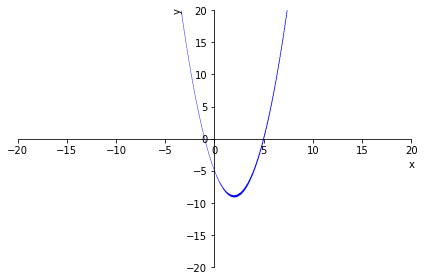

#### Ejercicio:

$f(x)=x^2-4x-5$ $\to$ \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_0.png}}

enunciado_latex: $f(x)=x^2-4x-5$
solucion_latex: \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_0.png}}


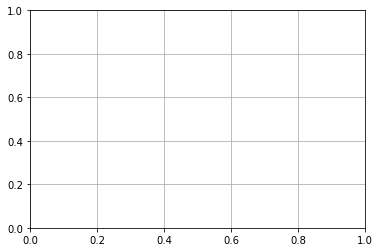

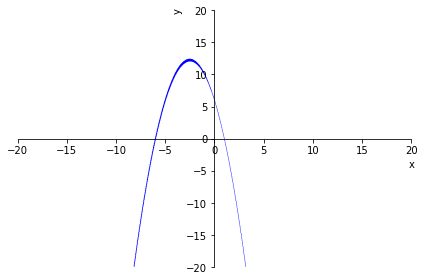

#### Ejercicio:

$f(x)=-x^2-5x+6$ $\to$ \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_1.png}}

enunciado_latex: $f(x)=-x^2-5x+6$
solucion_latex: \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_1.png}}


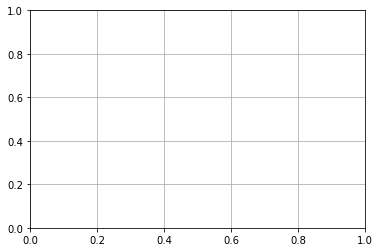

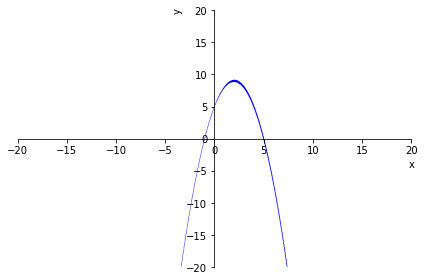

#### Ejercicio:

$f(x)=-x^2+4x+5$ $\to$ \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_2.png}}

enunciado_latex: $f(x)=-x^2+4x+5$
solucion_latex: \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_2.png}}


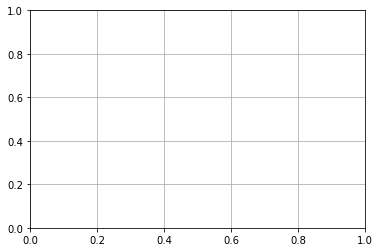

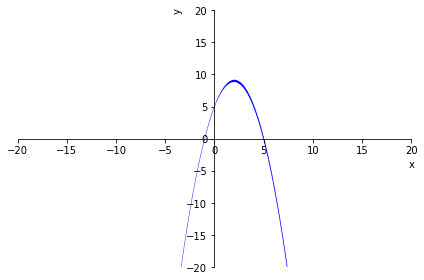

#### Ejercicio:

$f(x)=-x^2+4x+5$ $\to$ \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_3.png}}

enunciado_latex: $f(x)=-x^2+4x+5$
solucion_latex: \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_3.png}}


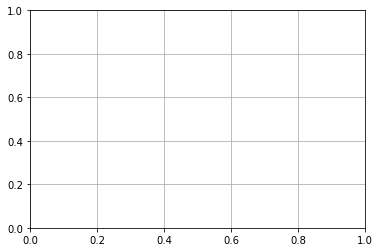

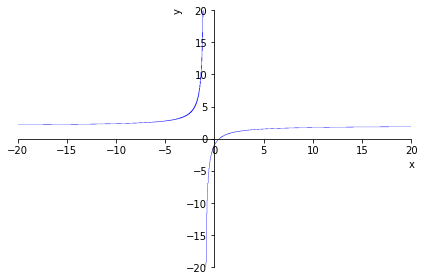

#### Ejercicio:

$f(x)=\frac{2x-1}{x+1}$ $\to$ \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_4.png}}

enunciado_latex: $f(x)=\frac{2x-1}{x+1}$
solucion_latex: \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_4.png}}


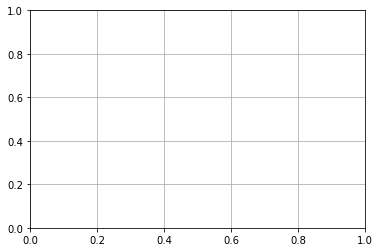

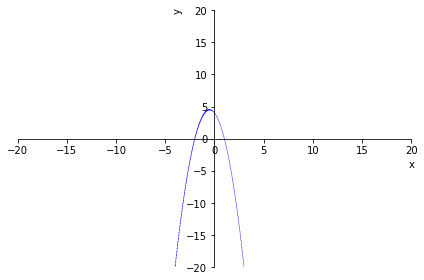

#### Ejercicio:

$f(x)=- 2 x^{2} - 2 x + 4$ $\to$ \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_5.png}}

enunciado_latex: $f(x)=- 2 x^{2} - 2 x + 4$
solucion_latex: \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_5.png}}


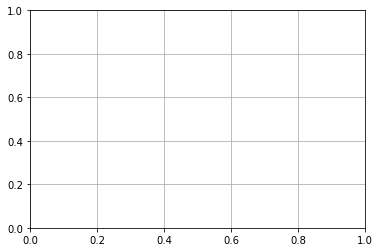

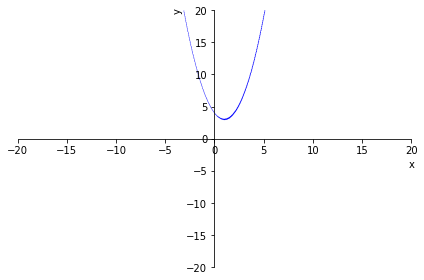

#### Ejercicio:

$f(x)=x^2-2x+4$ $\to$ \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_6.png}}

enunciado_latex: $f(x)=x^2-2x+4$
solucion_latex: \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_6.png}}
\question Representa las siguientes funciones e indica sus propiedades\begin{parts} \part[1] $f(x)=x^2-4x-5$\begin{solution} \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_0.png}}\end{solution} \part[1] $f(x)=-x^2-5x+6$\begin{solution} \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_1.png}}\end{solution} \part[1] $f(x)=-x^2+4x+5$\begin{solution} \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_2.png}}\end{solution} \part[1] $f(x)=-x^2+4x+5$\begin{solution} \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_3.png}}\end{solution} \part[1] $f(x)=\dfrac{2x-1}{x+1}$\begin{solution} \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_4.png}}\end{solution} \part[1] $f(x)=- 2 x^{2} - 2 x + 4$\begin{solution} \scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_5.png}}\end{solution} \part[1] $f(x)=x^2-2x+4$\begin{

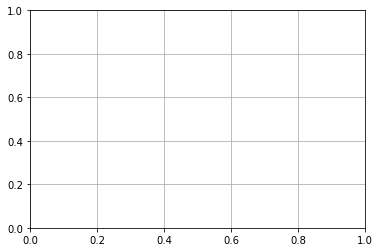

In [ ]:
texto_ejercicio = 'Representa las siguientes funciones e indica sus propiedades'
display(md("**"+texto_ejercicio+"**"))

pre_enunciado_latex = [r'x^2-4x-5', r'-x^2-5x+6',r'-x^2+4x+5',
#                        autoevaluación
                       r'-x^2+4x+5', r'\frac{2x-1}{x+1}',r'- 2 x^{2} - 2 x + 4',r'x^2-2x+4'

                       
                       ]
question=texto_ejercicio
parts=[]
sz=20

for n,i in enumerate(pre_enunciado_latex) :
#     enun, sol =r"$f(x)="+i+r"$",r"""\scalebox{.6}{\input{funcion_"""+latex(n)+r""".pgf}}"""
    enun, sol =r"$f(x)="+i+r"$",r"""\scalebox{.99}{\includegraphics[width=1\columnwidth]{funcion_"""+latex(n)+r""".png}}"""
    p= plot_implicit(Eq(y,parse_latex(i)),(x,-sz,sz),(y,-sz,sz))
    fg = p._backend.fig 
    ax = p._backend.ax
    ax[0].set_xlim(-sz,sz)
    ax[0].set_ylim(-sz,sz)
    ax[0].set_aspect('equal')
    plt.grid(True)
#     fg.savefig("funcion_{}.pgf".format(n))
    fg.savefig("funcion_{}.png".format(n))
    mostrar_ejercicio(enun, sol) 
    parts.append([enun, sol])          

print(latex_exam(question, parts).replace(r'\frac',r'\dfrac'))

In [ ]:
print(latex(expand(-2*(x-1)*(x+2))))

- 2 x^{2} - 2 x + 4


In [ ]:
f=Piecewise((2*x,x<3),(x**2-2*x-8,x<=3),(2*x-3,x>3))

In [ ]:
p=plot(x**2)
fg=p._backend.fig
plt.text(0,0,'origen')
plt.scatter(3,6)
fg.savefig('a_ver.png')

In [ ]:
# Resolver inecuaciones

texto_ejercicio = 'Resolver inecuaciones de primer grado:'

display(md("**"+texto_ejercicio+"**"))

pre_enunciado_latex = [
                     r'5x + 6 - \frac{x}{2} >  - 1', r'3 \cdot (x - 3) > 1 - 5x', r'2 - \frac{x}{3} + 2x > 1 - x',
                     r'8x - 6 \geq \frac{{2x}}{5}', r'\frac{{2x}}{3} - \frac{x}{2} + 5 < x - \frac{1}{3}',r'\frac{{4 - 3x}}{2} < x + 3',
                     r'\frac{{x + 1}}{3} - \frac{{x - 2}}{5} > 1 + \frac{{x - 1}}{{15}}',r'\frac{{x - 2}}{5} - \frac{{3x + 1}}{2} < \frac{x}{2} - 3x',
                     r'3x - \frac{{1 - 2x}}{4} < \frac{{x - 1}}{2} + 1',
                    # autoevaluacion
                        r'x\cdot(x+3) - 2x > 4x + 4',
                        r'\frac{2x-8}{3x + 9}>0',
                        r'2x^2 - 4x - 6 > 0',
                        r'x^4 + 2x^2 - 3x < 0',
                        r'\frac{2x-2}{1-3x}<-\frac{2}{3}',
                        r'\frac{x^2-3x+2}{x^2-x-6}\leq 0',
                        r'\frac{x^2-9}{x^2+2x}\geq 0',
                        r'- x^{5} + 2x \leq x'
    

                    ]

for i in pre_enunciado_latex :
    #display(sol_sist(s))
    mostrar_ejercicio(r"$"+i+r"$",r"$"+latex(solve_univariate_inequality(parse_latex(i), x,  relational=False))+r"$")

**Resolver inecuaciones de primer grado:**

#### Ejercicio:

$5x + 6 - \frac{x}{2} >  - 1$ $\to$ $\left(- \frac{14}{9}, \infty\right)$

enunciado_latex: $5x + 6 - \frac{x}{2} >  - 1$
solucion_latex: $\left(- \frac{14}{9}, \infty\right)$


#### Ejercicio:

$3 \cdot (x - 3) > 1 - 5x$ $\to$ $\left(\frac{5}{4}, \infty\right)$

enunciado_latex: $3 \cdot (x - 3) > 1 - 5x$
solucion_latex: $\left(\frac{5}{4}, \infty\right)$


#### Ejercicio:

$2 - \frac{x}{3} + 2x > 1 - x$ $\to$ $\left(- \frac{3}{8}, \infty\right)$

enunciado_latex: $2 - \frac{x}{3} + 2x > 1 - x$
solucion_latex: $\left(- \frac{3}{8}, \infty\right)$


#### Ejercicio:

$8x - 6 \geq \frac{{2x}}{5}$ $\to$ $\left[\frac{15}{19}, \infty\right)$

enunciado_latex: $8x - 6 \geq \frac{{2x}}{5}$
solucion_latex: $\left[\frac{15}{19}, \infty\right)$


#### Ejercicio:

$\frac{{2x}}{3} - \frac{x}{2} + 5 < x - \frac{1}{3}$ $\to$ $\left(\frac{32}{5}, \infty\right)$

enunciado_latex: $\frac{{2x}}{3} - \frac{x}{2} + 5 < x - \frac{1}{3}$
solucion_latex: $\left(\frac{32}{5}, \infty\right)$


#### Ejercicio:

$\frac{{4 - 3x}}{2} < x + 3$ $\to$ $\left(- \frac{2}{5}, \infty\right)$

enunciado_latex: $\frac{{4 - 3x}}{2} < x + 3$
solucion_latex: $\left(- \frac{2}{5}, \infty\right)$


#### Ejercicio:

$\frac{{x + 1}}{3} - \frac{{x - 2}}{5} > 1 + \frac{{x - 1}}{{15}}$ $\to$ $\left(3, \infty\right)$

enunciado_latex: $\frac{{x + 1}}{3} - \frac{{x - 2}}{5} > 1 + \frac{{x - 1}}{{15}}$
solucion_latex: $\left(3, \infty\right)$


#### Ejercicio:

$\frac{{x - 2}}{5} - \frac{{3x + 1}}{2} < \frac{x}{2} - 3x$ $\to$ $\left(-\infty, \frac{3}{4}\right)$

enunciado_latex: $\frac{{x - 2}}{5} - \frac{{3x + 1}}{2} < \frac{x}{2} - 3x$
solucion_latex: $\left(-\infty, \frac{3}{4}\right)$


#### Ejercicio:

$3x - \frac{{1 - 2x}}{4} < \frac{{x - 1}}{2} + 1$ $\to$ $\left(-\infty, \frac{1}{4}\right)$

enunciado_latex: $3x - \frac{{1 - 2x}}{4} < \frac{{x - 1}}{2} + 1$
solucion_latex: $\left(-\infty, \frac{1}{4}\right)$


#### Ejercicio:

$x\cdot(x+3) - 2x > 4x + 4$ $\to$ $\left(-\infty, -1\right) \cup \left(4, \infty\right)$

enunciado_latex: $x\cdot(x+3) - 2x > 4x + 4$
solucion_latex: $\left(-\infty, -1\right) \cup \left(4, \infty\right)$


#### Ejercicio:

$\frac{2x-8}{3x + 9}>0$ $\to$ $\left(-\infty, -3\right) \cup \left(4, \infty\right)$

enunciado_latex: $\frac{2x-8}{3x + 9}>0$
solucion_latex: $\left(-\infty, -3\right) \cup \left(4, \infty\right)$


#### Ejercicio:

$2x^2 - 4x - 6 > 0$ $\to$ $\left(-\infty, -1\right) \cup \left(3, \infty\right)$

enunciado_latex: $2x^2 - 4x - 6 > 0$
solucion_latex: $\left(-\infty, -1\right) \cup \left(3, \infty\right)$


#### Ejercicio:

$x^4 + 2x^2 - 3x < 0$ $\to$ $\left(0, 1\right)$

enunciado_latex: $x^4 + 2x^2 - 3x < 0$
solucion_latex: $\left(0, 1\right)$


#### Ejercicio:

$\frac{2x-2}{1-3x}<-\frac{2}{3}$ $\to$ $\left(-\infty, \frac{1}{3}\right)$

enunciado_latex: $\frac{2x-2}{1-3x}<-\frac{2}{3}$
solucion_latex: $\left(-\infty, \frac{1}{3}\right)$


#### Ejercicio:

$\frac{x^2-3x+2}{x^2-x-6}\leq 0$ $\to$ $\left(-2, 1\right] \cup \left[2, 3\right)$

enunciado_latex: $\frac{x^2-3x+2}{x^2-x-6}\leq 0$
solucion_latex: $\left(-2, 1\right] \cup \left[2, 3\right)$


#### Ejercicio:

$\frac{x^2-9}{x^2+2x}\geq 0$ $\to$ $\left(-\infty, -3\right] \cup \left(-2, 0\right) \cup \left[3, \infty\right)$

enunciado_latex: $\frac{x^2-9}{x^2+2x}\geq 0$
solucion_latex: $\left(-\infty, -3\right] \cup \left(-2, 0\right) \cup \left[3, \infty\right)$


#### Ejercicio:

$- x^{5} + 2x \leq x$ $\to$ $\left[-1, 0\right] \cup \left[1, \infty\right)$

enunciado_latex: $- x^{5} + 2x \leq x$
solucion_latex: $\left[-1, 0\right] \cup \left[1, \infty\right)$


In [ ]:
# Resolver inecuaciones

texto_ejercicio = 'Resolver inecuaciones de segundo grado:'

display(md("**"+texto_ejercicio+"**"))

pre_enunciado_latex = [
                     r'2{x^2} - 12x + 16 \leq 0', r'- {x^2} + 4 \leq 0', r'{x^2} + 6x + 9 \leq 0',
                     r'{x^2} - x - 6 > 0', r'{x^2} - 6x + 8 > 0',r'{x^2} + 6x + 24 > 0',
                     r'{x^2} - 3x > 0',r'2{x^2} - 10x - 12 \leq 0',
                     r' - 3{x^2} + 6x + 9 \leq 0', r'x \cdot ( x + 1 ) + 3x > 5x + 6',
                    #   Examen
                    r'8 x^{2} - 40 x + 48 \geq 0',
                    r'3 x^{2} - 15 x + 18 > 0',
                    r'(2 - x)(x - 3)(x - 1)^{2} > 0',
                    r'(2 - x)(x + 3)(x - 1)^{2} \geq 0',
                    r'(2 - x)(x - 3)x^{3} > 0',
                    r'(2 - x)(x + 3)x^{3} \geq 0',


                    ]

for i in pre_enunciado_latex :
    #display(sol_sist(s))
    mostrar_ejercicio(r"$"+i+r"$",r"$"+latex(solve_univariate_inequality(parse_latex(i), x,  relational=False))+r"$")

**Resolver inecuaciones de segundo grado:**

#### Ejercicio:

$2{x^2} - 12x + 16 \leq 0$ $\to$ $\left[2, 4\right]$

enunciado_latex: $2{x^2} - 12x + 16 \leq 0$
solucion_latex: $\left[2, 4\right]$


#### Ejercicio:

$- {x^2} + 4 \leq 0$ $\to$ $\left(-\infty, -2\right] \cup \left[2, \infty\right)$

enunciado_latex: $- {x^2} + 4 \leq 0$
solucion_latex: $\left(-\infty, -2\right] \cup \left[2, \infty\right)$


#### Ejercicio:

${x^2} + 6x + 9 \leq 0$ $\to$ $\left\{-3\right\}$

enunciado_latex: ${x^2} + 6x + 9 \leq 0$
solucion_latex: $\left\{-3\right\}$


#### Ejercicio:

${x^2} - x - 6 > 0$ $\to$ $\left(-\infty, -2\right) \cup \left(3, \infty\right)$

enunciado_latex: ${x^2} - x - 6 > 0$
solucion_latex: $\left(-\infty, -2\right) \cup \left(3, \infty\right)$


#### Ejercicio:

${x^2} - 6x + 8 > 0$ $\to$ $\left(-\infty, 2\right) \cup \left(4, \infty\right)$

enunciado_latex: ${x^2} - 6x + 8 > 0$
solucion_latex: $\left(-\infty, 2\right) \cup \left(4, \infty\right)$


#### Ejercicio:

${x^2} + 6x + 24 > 0$ $\to$ $\left(-\infty, \infty\right)$

enunciado_latex: ${x^2} + 6x + 24 > 0$
solucion_latex: $\left(-\infty, \infty\right)$


#### Ejercicio:

${x^2} - 3x > 0$ $\to$ $\left(-\infty, 0\right) \cup \left(3, \infty\right)$

enunciado_latex: ${x^2} - 3x > 0$
solucion_latex: $\left(-\infty, 0\right) \cup \left(3, \infty\right)$


#### Ejercicio:

$2{x^2} - 10x - 12 \leq 0$ $\to$ $\left[-1, 6\right]$

enunciado_latex: $2{x^2} - 10x - 12 \leq 0$
solucion_latex: $\left[-1, 6\right]$


#### Ejercicio:

$ - 3{x^2} + 6x + 9 \leq 0$ $\to$ $\left(-\infty, -1\right] \cup \left[3, \infty\right)$

enunciado_latex: $ - 3{x^2} + 6x + 9 \leq 0$
solucion_latex: $\left(-\infty, -1\right] \cup \left[3, \infty\right)$


#### Ejercicio:

$x \cdot ( x + 1 ) + 3x > 5x + 6$ $\to$ $\left(-\infty, -2\right) \cup \left(3, \infty\right)$

enunciado_latex: $x \cdot ( x + 1 ) + 3x > 5x + 6$
solucion_latex: $\left(-\infty, -2\right) \cup \left(3, \infty\right)$


#### Ejercicio:

$8 x^{2} - 40 x + 48 \geq 0$ $\to$ $\left(-\infty, 2\right] \cup \left[3, \infty\right)$

enunciado_latex: $8 x^{2} - 40 x + 48 \geq 0$
solucion_latex: $\left(-\infty, 2\right] \cup \left[3, \infty\right)$


#### Ejercicio:

$3 x^{2} - 15 x + 18 > 0$ $\to$ $\left(-\infty, 2\right) \cup \left(3, \infty\right)$

enunciado_latex: $3 x^{2} - 15 x + 18 > 0$
solucion_latex: $\left(-\infty, 2\right) \cup \left(3, \infty\right)$


#### Ejercicio:

$(2 - x)(x - 3)(x - 1)^{2} > 0$ $\to$ $\left(2, 3\right)$

enunciado_latex: $(2 - x)(x - 3)(x - 1)^{2} > 0$
solucion_latex: $\left(2, 3\right)$


#### Ejercicio:

$(2 - x)(x + 3)(x - 1)^{2} \geq 0$ $\to$ $\left[-3, 2\right]$

enunciado_latex: $(2 - x)(x + 3)(x - 1)^{2} \geq 0$
solucion_latex: $\left[-3, 2\right]$


#### Ejercicio:

$(2 - x)(x - 3)x^{3} > 0$ $\to$ $\left(-\infty, 0\right) \cup \left(2, 3\right)$

enunciado_latex: $(2 - x)(x - 3)x^{3} > 0$
solucion_latex: $\left(-\infty, 0\right) \cup \left(2, 3\right)$


#### Ejercicio:

$(2 - x)(x + 3)x^{3} \geq 0$ $\to$ $\left(-\infty, -3\right] \cup \left[0, 2\right]$

enunciado_latex: $(2 - x)(x + 3)x^{3} \geq 0$
solucion_latex: $\left(-\infty, -3\right] \cup \left[0, 2\right]$


In [ ]:
latex(expand((x-2)*(x-3)*8
)), 
print(latex((S((x-3)*(2-x)*(x-1)**2, evaluate=False))))

\left(2 - x\right) \left(x - 3\right) \left(x - 1\right)^{2}


In [ ]:
# Resolver sistemas de inecuaciones

texto_ejercicio = 'Resolver sistemas de inecuaciones:'

display(md("**"+texto_ejercicio+"**"))

pre_enunciado_latex = [
                     [r'2x + 6 < 0',r'x + \frac{1}{3} \geq \frac{x}{2}'],
                     [r'x + 4 < 0 ',r' x + 1 < \frac{x}{2}'],
                     [r'x \leq 0',r'\frac{x}{2} + \frac{x}{3} - 6 \leq 5'],
                     [r'x - 2 \leq 2x + 1',r' 3 - x < 1 - 2x'],
                     [r' \frac{x}{3} + x < 4',r'\frac{x}{2} - \frac{x}{3} > 0'],
                     [r'\frac{{x - 4}}{2} + \frac{{x + 2}}{3} \leq 2',r' \frac{x}{3} - \frac{x}{2} \leq 1'],
                     [r'\frac{x}{3} - \frac{x}{2} \geq 1',r'{( {x + 1} )^2} - {x^2} \leq 1'],
                     [r'5x + 8 \leq 14 + 3x',r'14x - 34 > 12x - 36'],
                     # Autoevaluacion
                     [r'2x + 8 > 0',r'x + \frac{1}{2} \geq \frac{x}{3}'],
                     [r'\frac{x}{3} - \frac{x}{2} \leq 1',r'{( {x + 1} )^2} - {x^2} \geq 1'],
                     [r'\frac{{x - 4}}{2} - \frac{{x - 2}}{3} \leq 12',r' \frac{x}{3} - \frac{x}{2} \geq 6'],
                     [r'2x + 6 > 8',r'x + \frac{1}{3} \leq \frac{x}{2}'],
                    #  Examen
                    [r'\frac{{x - 1}}{2} - \frac{{x + 2}}{3} \leq 12',r' \frac{x}{2} - \frac{x}{3} \geq 3'],
                    [r'\frac{{x - 1}}{2} - \frac{{x + 2}}{3} \leq 12',r' \frac{x}{2} - \frac{x}{3} \leq 1'],
                    ]

for s in pre_enunciado_latex :
    sist = [parse_latex(j) for j in s]
    sist_latex=r"""\left\{\begin{matrix}"""+r" \\ ". join(s) + r'\end{matrix}\right.'
    # display(reduce_rational_inequalities([sist],x,relational=False))
    mostrar_ejercicio(r"$"+sist_latex+r"$",r"$"+latex(reduce_rational_inequalities([sist],x,relational=False))+r"$")

**Resolver sistemas de inecuaciones:**

#### Ejercicio:

$\left\{\begin{matrix}2x + 6 < 0 \\ x + \frac{1}{3} \geq \frac{x}{2}\end{matrix}\right.$ $\to$ $\emptyset$

enunciado_latex: $\left\{\begin{matrix}2x + 6 < 0 \\ x + \frac{1}{3} \geq \frac{x}{2}\end{matrix}\right.$
solucion_latex: $\emptyset$


#### Ejercicio:

$\left\{\begin{matrix}x + 4 < 0  \\  x + 1 < \frac{x}{2}\end{matrix}\right.$ $\to$ $\left(-\infty, -4\right)$

enunciado_latex: $\left\{\begin{matrix}x + 4 < 0  \\  x + 1 < \frac{x}{2}\end{matrix}\right.$
solucion_latex: $\left(-\infty, -4\right)$


#### Ejercicio:

$\left\{\begin{matrix}x \leq 0 \\ \frac{x}{2} + \frac{x}{3} - 6 \leq 5\end{matrix}\right.$ $\to$ $\left(-\infty, 0\right]$

enunciado_latex: $\left\{\begin{matrix}x \leq 0 \\ \frac{x}{2} + \frac{x}{3} - 6 \leq 5\end{matrix}\right.$
solucion_latex: $\left(-\infty, 0\right]$


#### Ejercicio:

$\left\{\begin{matrix}x - 2 \leq 2x + 1 \\  3 - x < 1 - 2x\end{matrix}\right.$ $\to$ $\left[-3, -2\right)$

enunciado_latex: $\left\{\begin{matrix}x - 2 \leq 2x + 1 \\  3 - x < 1 - 2x\end{matrix}\right.$
solucion_latex: $\left[-3, -2\right)$


#### Ejercicio:

$\left\{\begin{matrix} \frac{x}{3} + x < 4 \\ \frac{x}{2} - \frac{x}{3} > 0\end{matrix}\right.$ $\to$ $\left(0, 3\right)$

enunciado_latex: $\left\{\begin{matrix} \frac{x}{3} + x < 4 \\ \frac{x}{2} - \frac{x}{3} > 0\end{matrix}\right.$
solucion_latex: $\left(0, 3\right)$


#### Ejercicio:

$\left\{\begin{matrix}\frac{{x - 4}}{2} + \frac{{x + 2}}{3} \leq 2 \\  \frac{x}{3} - \frac{x}{2} \leq 1\end{matrix}\right.$ $\to$ $\left[-6, 4\right]$

enunciado_latex: $\left\{\begin{matrix}\frac{{x - 4}}{2} + \frac{{x + 2}}{3} \leq 2 \\  \frac{x}{3} - \frac{x}{2} \leq 1\end{matrix}\right.$
solucion_latex: $\left[-6, 4\right]$


#### Ejercicio:

$\left\{\begin{matrix}\frac{x}{3} - \frac{x}{2} \geq 1 \\ {( {x + 1} )^2} - {x^2} \leq 1\end{matrix}\right.$ $\to$ $\left(-\infty, -6\right]$

enunciado_latex: $\left\{\begin{matrix}\frac{x}{3} - \frac{x}{2} \geq 1 \\ {( {x + 1} )^2} - {x^2} \leq 1\end{matrix}\right.$
solucion_latex: $\left(-\infty, -6\right]$


#### Ejercicio:

$\left\{\begin{matrix}5x + 8 \leq 14 + 3x \\ 14x - 34 > 12x - 36\end{matrix}\right.$ $\to$ $\left(-1, 3\right]$

enunciado_latex: $\left\{\begin{matrix}5x + 8 \leq 14 + 3x \\ 14x - 34 > 12x - 36\end{matrix}\right.$
solucion_latex: $\left(-1, 3\right]$


#### Ejercicio:

$\left\{\begin{matrix}2x + 8 > 0 \\ x + \frac{1}{2} \geq \frac{x}{3}\end{matrix}\right.$ $\to$ $\left[- \frac{3}{4}, \infty\right)$

enunciado_latex: $\left\{\begin{matrix}2x + 8 > 0 \\ x + \frac{1}{2} \geq \frac{x}{3}\end{matrix}\right.$
solucion_latex: $\left[- \frac{3}{4}, \infty\right)$


#### Ejercicio:

$\left\{\begin{matrix}\frac{x}{3} - \frac{x}{2} \leq 1 \\ {( {x + 1} )^2} - {x^2} \geq 1\end{matrix}\right.$ $\to$ $\left[0, \infty\right)$

enunciado_latex: $\left\{\begin{matrix}\frac{x}{3} - \frac{x}{2} \leq 1 \\ {( {x + 1} )^2} - {x^2} \geq 1\end{matrix}\right.$
solucion_latex: $\left[0, \infty\right)$


#### Ejercicio:

$\left\{\begin{matrix}\frac{{x - 4}}{2} - \frac{{x - 2}}{3} \leq 12 \\  \frac{x}{3} - \frac{x}{2} \geq 6\end{matrix}\right.$ $\to$ $\left(-\infty, -36\right]$

enunciado_latex: $\left\{\begin{matrix}\frac{{x - 4}}{2} - \frac{{x - 2}}{3} \leq 12 \\  \frac{x}{3} - \frac{x}{2} \geq 6\end{matrix}\right.$
solucion_latex: $\left(-\infty, -36\right]$


#### Ejercicio:

$\left\{\begin{matrix}2x + 6 > 8 \\ x + \frac{1}{3} \leq \frac{x}{2}\end{matrix}\right.$ $\to$ $\emptyset$

enunciado_latex: $\left\{\begin{matrix}2x + 6 > 8 \\ x + \frac{1}{3} \leq \frac{x}{2}\end{matrix}\right.$
solucion_latex: $\emptyset$


#### Ejercicio:

$\left\{\begin{matrix}\frac{{x - 1}}{2} - \frac{{x + 2}}{3} \leq 12 \\  \frac{x}{2} - \frac{x}{3} \geq 3\end{matrix}\right.$ $\to$ $\left[18, 79\right]$

enunciado_latex: $\left\{\begin{matrix}\frac{{x - 1}}{2} - \frac{{x + 2}}{3} \leq 12 \\  \frac{x}{2} - \frac{x}{3} \geq 3\end{matrix}\right.$
solucion_latex: $\left[18, 79\right]$


#### Ejercicio:

$\left\{\begin{matrix}\frac{{x - 1}}{2} - \frac{{x + 2}}{3} \leq 12 \\  \frac{x}{2} - \frac{x}{3} \leq 1\end{matrix}\right.$ $\to$ $\left(-\infty, 6\right]$

enunciado_latex: $\left\{\begin{matrix}\frac{{x - 1}}{2} - \frac{{x + 2}}{3} \leq 12 \\  \frac{x}{2} - \frac{x}{3} \leq 1\end{matrix}\right.$
solucion_latex: $\left(-\infty, 6\right]$


In [ ]:
# Resolver inecuaciones

texto_ejercicio = 'Resolver inecuaciones de racionales:'

display(md("**"+texto_ejercicio+"**"))

pre_enunciado_latex = [
                     r'\frac{{( {x + 3} )}}{{x - 4}} \geq 0', r'\frac{{2x + 6}}{{x - 5}} \geq 0',
                     r'\frac{{x - 8}}{{3x - 6}} < 0', r'\frac{{x - 2}}{{x + 2}} < 0',
                     r'\frac{{x + 3}}{{4x}} < 0',
                     r'\frac{{( {x - 1} ) \cdot ( {x - 2} )}}{{3{x^2} + 4}} \geq 0'
                    ]

for i in pre_enunciado_latex :
    #display(sol_sist(s))
    mostrar_ejercicio(r"$"+i+r"$",r"$"+latex(solve_univariate_inequality(parse_latex(i), x,  relational=False))+r"$")

**Resolver inecuaciones de racionales:**

#### Ejercicio:

$\frac{{( {x + 3} )}}{{x - 4}} \geq 0$ $\to$ $\left(-\infty, -3\right] \cup \left(4, \infty\right)$

enunciado_latex: $\frac{{( {x + 3} )}}{{x - 4}} \geq 0$
solucion_latex: $\left(-\infty, -3\right] \cup \left(4, \infty\right)$


#### Ejercicio:

$\frac{{2x + 6}}{{x - 5}} \geq 0$ $\to$ $\left(-\infty, -3\right] \cup \left(5, \infty\right)$

enunciado_latex: $\frac{{2x + 6}}{{x - 5}} \geq 0$
solucion_latex: $\left(-\infty, -3\right] \cup \left(5, \infty\right)$


#### Ejercicio:

$\frac{{x - 8}}{{3x - 6}} < 0$ $\to$ $\left(2, 8\right)$

enunciado_latex: $\frac{{x - 8}}{{3x - 6}} < 0$
solucion_latex: $\left(2, 8\right)$


#### Ejercicio:

$\frac{{x - 2}}{{x + 2}} < 0$ $\to$ $\left(-2, 2\right)$

enunciado_latex: $\frac{{x - 2}}{{x + 2}} < 0$
solucion_latex: $\left(-2, 2\right)$


#### Ejercicio:

$\frac{{x + 3}}{{4x}} < 0$ $\to$ $\left(-3, 0\right)$

enunciado_latex: $\frac{{x + 3}}{{4x}} < 0$
solucion_latex: $\left(-3, 0\right)$


#### Ejercicio:

$\frac{{( {x - 1} ) \cdot ( {x - 2} )}}{{3{x^2} + 4}} \geq 0$ $\to$ $\left(-\infty, 1\right] \cup \left[2, \infty\right)$

enunciado_latex: $\frac{{( {x - 1} ) \cdot ( {x - 2} )}}{{3{x^2} + 4}} \geq 0$
solucion_latex: $\left(-\infty, 1\right] \cup \left[2, \infty\right)$


In [ ]:
# Resolver inecuaciones

texto_ejercicio = 'Resolver inecuaciones con valor absoluto:'

display(md("**"+texto_ejercicio+"**"))

pre_enunciado_latex = [
                     r'\frac{{( {x + 3} )}}{{x - 4}} \geq 0', r'\frac{{2x + 6}}{{x - 5}} \geq 0',
                     r'\frac{{x - 8}}{{3x - 6}} < 0', r'\frac{{x - 2}}{{x + 2}} < 0',
                     r'\frac{{x + 3}}{{4x}} < 0',
                     r'\frac{{( {x - 1} ) \cdot ( {x - 2} )}}{{3{x^2} + 4}} \geq 0'
                    ]

for i in pre_enunciado_latex :
    #display(sol_sist(s))
    mostrar_ejercicio(r"$"+i+r"$",r"$"+latex(solve_univariate_inequality(parse_latex(i), x,  relational=False))+r"$")

**Resolver inecuaciones con valor absoluto:**

#### Ejercicio:

$\frac{{( {x + 3} )}}{{x - 4}} \geq 0$ $\to$ $\left(-\infty, -3\right] \cup \left(4, \infty\right)$

enunciado_latex: $\frac{{( {x + 3} )}}{{x - 4}} \geq 0$
solucion_latex: $\left(-\infty, -3\right] \cup \left(4, \infty\right)$


#### Ejercicio:

$\frac{{2x + 6}}{{x - 5}} \geq 0$ $\to$ $\left(-\infty, -3\right] \cup \left(5, \infty\right)$

enunciado_latex: $\frac{{2x + 6}}{{x - 5}} \geq 0$
solucion_latex: $\left(-\infty, -3\right] \cup \left(5, \infty\right)$


#### Ejercicio:

$\frac{{x - 8}}{{3x - 6}} < 0$ $\to$ $\left(2, 8\right)$

enunciado_latex: $\frac{{x - 8}}{{3x - 6}} < 0$
solucion_latex: $\left(2, 8\right)$


#### Ejercicio:

$\frac{{x - 2}}{{x + 2}} < 0$ $\to$ $\left(-2, 2\right)$

enunciado_latex: $\frac{{x - 2}}{{x + 2}} < 0$
solucion_latex: $\left(-2, 2\right)$


#### Ejercicio:

$\frac{{x + 3}}{{4x}} < 0$ $\to$ $\left(-3, 0\right)$

enunciado_latex: $\frac{{x + 3}}{{4x}} < 0$
solucion_latex: $\left(-3, 0\right)$


#### Ejercicio:

$\frac{{( {x - 1} ) \cdot ( {x - 2} )}}{{3{x^2} + 4}} \geq 0$ $\to$ $\left(-\infty, 1\right] \cup \left[2, \infty\right)$

enunciado_latex: $\frac{{( {x - 1} ) \cdot ( {x - 2} )}}{{3{x^2} + 4}} \geq 0$
solucion_latex: $\left(-\infty, 1\right] \cup \left[2, \infty\right)$


In [ ]:
# Resolver inecuaciones

texto_ejercicio = 'Resolver inecuaciones con valor absoluto:'

display(md("**"+texto_ejercicio+"**"))

pre_enunciado_latex = [
                     r'| {3x - 1} | \leq 5', r'| {4x + 3} |> 2', r'| {3 - 4x} | \geq 5', r'| {5x - 3} | \leq 2'

                    ]

for i in pre_enunciado_latex :
    ine = parse_latex(i)    
    des = '>=' if ine.has(GreaterThan) else '<=' if ine.has(LessThan) else '>' if ine.has(StrictGreaterThan) else '<' if ine.has(StrictLessThan) else 'ninguno'
    mostrar_ejercicio(r"$"+i+r"$",r"$"+latex(reduce_abs_inequalities([(ine.args[0]-ine.args[1],des)],x).as_set())+r"$")

**Resolver inecuaciones con valor absoluto:**

#### Ejercicio:

$| {3x - 1} | \leq 5$ $\to$ $\left[- \frac{4}{3}, 2\right]$

enunciado_latex: $| {3x - 1} | \leq 5$
solucion_latex: $\left[- \frac{4}{3}, 2\right]$


#### Ejercicio:

$| {4x + 3} |> 2$ $\to$ $\left(-\infty, - \frac{5}{4}\right) \cup \left(- \frac{1}{4}, \infty\right)$

enunciado_latex: $| {4x + 3} |> 2$
solucion_latex: $\left(-\infty, - \frac{5}{4}\right) \cup \left(- \frac{1}{4}, \infty\right)$


#### Ejercicio:

$| {3 - 4x} | \geq 5$ $\to$ $\left(-\infty, - \frac{1}{2}\right] \cup \left[2, \infty\right)$

enunciado_latex: $| {3 - 4x} | \geq 5$
solucion_latex: $\left(-\infty, - \frac{1}{2}\right] \cup \left[2, \infty\right)$


#### Ejercicio:

$| {5x - 3} | \leq 2$ $\to$ $\left[\frac{1}{5}, 1\right]$

enunciado_latex: $| {5x - 3} | \leq 2$
solucion_latex: $\left[\frac{1}{5}, 1\right]$


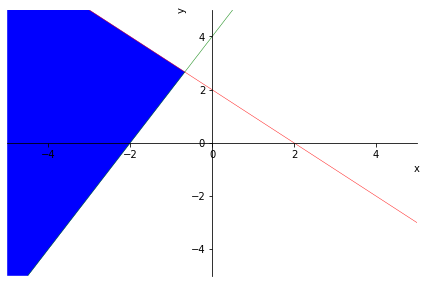

In [ ]:
%matplotlib inline

sist = [r'x + y \leq 2 ',r' - 2x + y \geq 4']
s=[parse_latex(i) for i in sist]
p1=plot_implicit(And(s[0],s[1]), show=False)
# p1.extend(plot_implicit(Eq(x+y,2),line_color='r', show=False))
p1.extend(plot_implicit(Eq(s[0].args[0],s[0].args[1]),line_color='r', show=False))
p1.extend(plot_implicit(Eq(s[1].args[0],s[1].args[1]),line_color='g', show=False))
p1.show()
#p1.save('p1.pgf')



**Resolver sistemas de inecuaciones con dos incógnitas:**

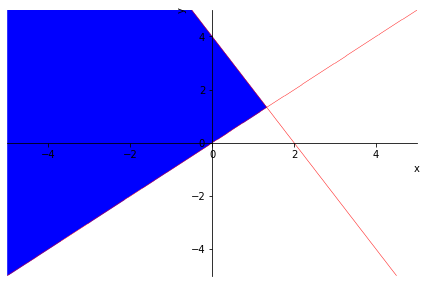

#### Ejercicio:

$\left\{\begin{matrix}y <  - 2x + 4 \\ y \geq x\end{matrix}\right.$ $\to$ \scalebox{.6}{\input{sistema_0.pgf}}

enunciado_latex: $\left\{\begin{matrix}y <  - 2x + 4 \\ y \geq x\end{matrix}\right.$
solucion_latex: \scalebox{.6}{\input{sistema_0.pgf}}


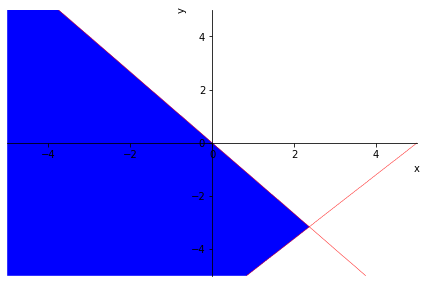

#### Ejercicio:

$\left\{\begin{matrix}6x - 5y \leq 30 \\ 4x + 3y \leq 0\end{matrix}\right.$ $\to$ \scalebox{.6}{\input{sistema_1.pgf}}

enunciado_latex: $\left\{\begin{matrix}6x - 5y \leq 30 \\ 4x + 3y \leq 0\end{matrix}\right.$
solucion_latex: \scalebox{.6}{\input{sistema_1.pgf}}


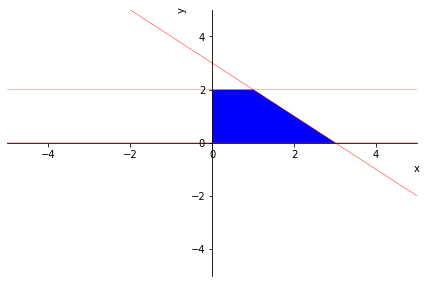

#### Ejercicio:

$\left\{\begin{matrix}y \leq 2 \\ x + y \leq 3 \\ x \geq 0 \\ y \geq 0\end{matrix}\right.$ $\to$ \scalebox{.6}{\input{sistema_2.pgf}}

enunciado_latex: $\left\{\begin{matrix}y \leq 2 \\ x + y \leq 3 \\ x \geq 0 \\ y \geq 0\end{matrix}\right.$
solucion_latex: \scalebox{.6}{\input{sistema_2.pgf}}


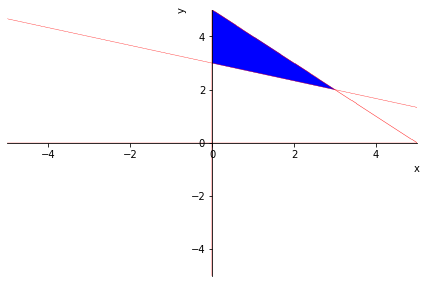

#### Ejercicio:

$\left\{\begin{matrix}x + y \leq 5 \\ x + 3y \geq 9 \\ x \geq 0 \\ y \geq 0\end{matrix}\right.$ $\to$ \scalebox{.6}{\input{sistema_3.pgf}}

enunciado_latex: $\left\{\begin{matrix}x + y \leq 5 \\ x + 3y \geq 9 \\ x \geq 0 \\ y \geq 0\end{matrix}\right.$
solucion_latex: \scalebox{.6}{\input{sistema_3.pgf}}


In [ ]:
%matplotlib inline

# Resolver sistemas de inecuaciones con dos incógnitas

texto_ejercicio = 'Resolver sistemas de inecuaciones con dos incógnitas:'

display(md("**"+texto_ejercicio+"**"))

sistemas = [
                    [r'y <  - 2x + 4' , r'y \geq x'], 
                    [r'6x - 5y \leq 30', r'4x + 3y \leq 0'],
                    [r'y \leq 2',r'x + y \leq 3',r'x \geq 0', r'y \geq 0'],
                    [r'x + y \leq 5',r'x + 3y \geq 9', r'x \geq 0', r'y \geq 0'],
                        #  [r'x + y \leq 2 ',r' - 2x + y \geq 4'],
#                     [r'y <  - 2x + 4',r'y \geq x',r'x \geq-2']
                    
    
                    ]

for j,sist in enumerate(sistemas) :
    s=[parse_latex(i) for i in sist]
    sist_latex=r"""\left\{\begin{matrix}"""+r" \\ ". join(sist)+ r'\end{matrix}\right.'
    set=s[0]
    for k in range(len(sist)-1) :
        set = And(set,s[k+1])
    p1=plot_implicit(set, show=False)
    # p1.extend(plot_implicit(Eq(x+y,2),line_color='r', show=False))
    for k in range(len(sist)):
        p1.extend(plot_implicit(Eq(s[k].args[0],s[k].args[1]),x_var=x,line_color='r', show=False))
    
    p1.save('sistema_{}.pgf'.format(j))
    p1.show()
#     p1.save('sistema_{}.png'.format(j))
    mostrar_ejercicio(r"$"+sist_latex+r"$",r"""\scalebox{.6}{\input{sistema_"""+latex(j)+r""".pgf}}""")